In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import networkx as nx

In [2]:
network = pd.read_csv("./data/twitter.csv")
fakeIds = pd.read_csv("./data/twitter_fake_ids.csv")

In [3]:
df = pd.DataFrame(columns=["id", "following", "followers", "label"])

In [4]:
ids = set(np.append(network["src"].unique(), network["dst"].unique()))
df["id"] = sorted(ids)

In [5]:
# Sets number of peers following for all users
following_vals = dict(network["src"].value_counts())
def setFollowing(x):
    try:
        return following_vals[x]
    except:
        return 0
df["following"] = df["id"].apply(setFollowing)

In [6]:
# Sets number of followers for all users - note: takes a while
follower_vals = dict(network["dst"].value_counts()) 
def setFollowers(x):
    try:
        return follower_vals[x]
    except:
        return 0
df["followers"] = df["id"].apply(setFollowers)

In [7]:
# Sets labels for fake users (1 if fake, 0 otherwise) - note: takes a while
def setLabels(x):
    try:
        if x in fakeIds["id"].values:
            return 1
        else:
            return 0
    except:
        return 0    
df["label"] = df["id"].apply(setLabels)

In [8]:
df.to_csv("temp.csv") # for testing

In [9]:
df = pd.read_csv("temp.csv") # reset df 

In [10]:
df["followers"].value_counts()

1       3799968
2        683692
3        273138
4        146786
5         91526
         ...   
950           1
949           1
944           1
937           1
4061          1
Name: followers, Length: 1091, dtype: int64

In [11]:
df["following"].value_counts()

0       5303682
100       43176
1000       3456
101        2887
1          2877
         ...   
845           1
1011          1
988           1
818           1
1012          1
Name: following, Length: 1012, dtype: int64

In [12]:
# FILTERING PROCESS, current decision: 
df = df.loc[(df["followers"] > 0) & (df["following"] > 0)]

In [13]:
len(df)

75814

In [14]:
print("Anomalies in Pruned Network dataset:",len(df.loc[df["label"] == 1].values))
print("Anomalies in FakeIds dataset:",len(fakeIds["id"].values))

Anomalies in Pruned Network dataset: 6807
Anomalies in FakeIds dataset: 12437


In [15]:
df.iloc[:,2:].describe()

,following,followers,label
count,75814.000000,75814.000000,75814.000000
mean,197.244506,21.904305,0.089786
std,266.787344,62.207096,0.285876
min,1.000000,1.000000,0.000000
25%,100.000000,2.000000,0.000000
50%,100.000000,6.000000,0.000000
75%,101.000000,19.000000,0.000000
max,1012.000000,2935.000000,1.000000


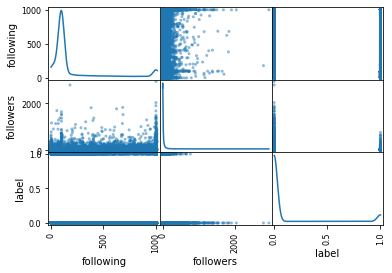

In [16]:
pd.plotting.scatter_matrix(df[df.columns[2:]], diagonal='kde')
plt.show()

Text(0, 0.5, 'Followers')

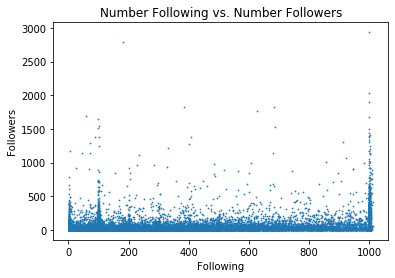

In [17]:
# Looks like it follows intuitive reasoning; most users have fewer followers than they follow.
plt.scatter(df["following"], df["followers"], s=0.5)
plt.title("Number Following vs. Number Followers")
plt.xlabel("Following")
plt.ylabel("Followers")

In [18]:
# Pruning the dataset makes us lose many anomalies -- following 0 users might be an indicator of a fake user?
# Also reduces dataset size from ~5.4 million to just 75,814 users, which seems weird --> analyze this more?
# Should we even prune users - up for discussion!
df["label"].value_counts()

0    69007
1     6807
Name: label, dtype: int64

In [19]:
# Draw the directed graph programatically - Note: takes a REALLY long time
# G = nx.Graph()

# print("Creating list of edges...")
# edgesList = list(zip(network["src"], network["dst"]))
# print("Done.")

# print("Drawing edges...")
# G.add_edges_from(edgesList) # draw all edges
# print("Done.")

# print("Coloring nodes representing fake users...")
# color_map = [ "red" for node in G if node in fakeIds["id"].values ] # color fake users
# print("Done.")

# print("Drawing full graph...")
# nx.draw(G, node_color = color_map,with_labels = True)
# print("Done.")

# plt.savefig("network.png") # save as png
# plt.show() 